## Bài tập thực hành Xác suất và Thống kê

In this assignment, we will use the dataset of diabetes patients taken [from here](https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html).

In [27]:
import pandas as pd

# URL của tệp dữ liệu
url = 'https://www4.stat.ncsu.edu/~boos/var.select/diabetes.tab.txt'

# Đọc dữ liệu từ URL vào DataFrame
df = pd.read_csv(url, sep='\t')

# Hiển thị thông tin tổng quan về DataFrame
# print(df.info())

# Hiển thị 5 hàng đầu tiên của DataFrame
print(df.head())


   AGE  SEX   BMI     BP   S1     S2    S3   S4      S5  S6    Y
0   59    2  32.1  101.0  157   93.2  38.0  4.0  4.8598  87  151
1   48    1  21.6   87.0  183  103.2  70.0  3.0  3.8918  69   75
2   72    2  30.5   93.0  156   93.6  41.0  4.0  4.6728  85  141
3   24    1  25.3   84.0  198  131.4  40.0  5.0  4.8903  89  206
4   50    1  23.0  101.0  192  125.4  52.0  4.0  4.2905  80  135


Nếu muốn chuyển giá trị trong cột Giới tính từ [1;2] thành [Nam;Nữ] hoặc [0;1] thì dùng hàm replace() như sau:

In [28]:
import pandas as pd

# Thay thế giá trị trong cột 'SEX': 1 -> 0, 2 -> 1
df['SEX'] = df['SEX'].replace({1: 0, 2: 1})

# Kiểm tra kết quả
print(df['SEX'].value_counts())


SEX
0    235
1    207
Name: count, dtype: int64



In this dataset, columns as the following:
* Age and sex are self-explanatory
* BMI is body mass index
* BP is average blood pressure
* S1 through S6 are different blood measurements
* Y is the qualitative measure of disease progression over one year

Let's study this dataset using methods of probability and statistics.

### Task 1: Compute mean values and variance for all values

In [29]:
import pandas as pd

# Tính giá trị trung bình cho tất cả các cột số
mean_values = df.mean()

# Tính phương sai cho tất cả các cột số
variance_values = df.var()

# Hiển thị kết quả
print("Giá trị trung bình của các cột là:")
print(mean_values)
print("\nPhương sai của các cột là:")
print(variance_values)


Giá trị trung bình của các cột là:
AGE     48.518100
SEX      0.468326
BMI     26.375792
BP      94.647014
S1     189.140271
S2     115.439140
S3      49.788462
S4       4.070249
S5       4.641411
S6      91.260181
Y      152.133484
dtype: float64

Phương sai của các cột là:
AGE     171.846610
SEX       0.249561
BMI      19.519798
BP      191.304401
S1     1197.717241
S2      924.955494
S3      167.293585
S4        1.665261
S5        0.272892
S6      132.165712
Y      5943.331348
dtype: float64


**Nhận định:**
* Giá trị trung bình cột Giới tính là 0.46 gần 0.5 thì có nghĩa là mẫu này có số lượng nam nữ gần cân bằng.

* BMI lớn hơn 26 thì trung bình mẫu này có mức độ thừa cân ở mức 2.

### Task 2: Plot boxplots for BMI, BP and Y depending on gender

In [31]:
# Cài thư viện và các chuẩn bị khác
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# cột 'SEX' được mã hóa dưới dạng 0 và 1
# Nếu cần, bạn có thể chuyển đổi 'SEX' thành kiểu chuỗi để hiển thị nhãn rõ ràng hơn
# df['SEX'] = df['SEX'].map({0: 'Nam', 1: 'Nữ'})



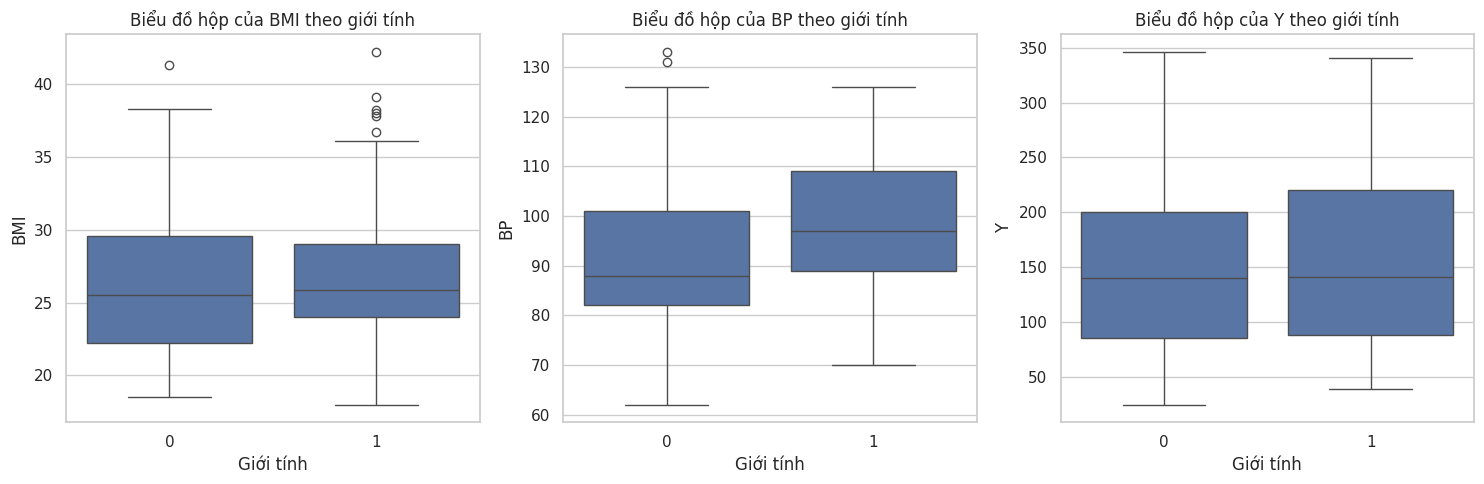

In [32]:
# Thiết lập kiểu dáng cho biểu đồ
sns.set(style="whitegrid")

# Tạo một figure với kích thước tùy chỉnh
plt.figure(figsize=(15, 5))

# Danh sách các biến cần vẽ
variables = ['BMI', 'BP', 'Y']

# Lặp qua các biến và vẽ biểu đồ hộp cho từng biến
for i, var in enumerate(variables):
    plt.subplot(1, 3, i + 1)  # Tạo subplot
    sns.boxplot(x='SEX', y=var, data=df)
    plt.title(f'Biểu đồ hộp của {var} theo giới tính')
    plt.xlabel('Giới tính')
    plt.ylabel(var)

# Điều chỉnh khoảng cách giữa các subplot
plt.tight_layout()

# Hiển thị biểu đồ
plt.show()


**Nhận định:**
* BMI của nữ và nam có trung vị tương đương nhau nhưng nam giới có mức độ phân tán hơn (điểm Q1 và Q3 có khoảng rộng hơn). Ngoài ra, nữ giới có nhiều điểm ngoại lai hơn nam giới (6 so với 1).
* Huyết áp của nữ có giá trị trung vị, Q1 và Q3 đều hơn nam giới. Để khẳng định giả thuyết này thì chúng ta có thể tiến hành kiểm định.
* Về mức độ tiến triển của bệnh, không cho thấy sự khác biệt ở giá trị trung vị, giá trị Q1 và Q3.

### Task 3: What is the the distribution of Age, Sex, BMI and Y variables?

In [33]:
# Thống kê mô tả
import pandas as pd

# Thống kê mô tả cho các biến số
print(df[['AGE', 'BMI', 'Y']].describe())

# Thống kê tần số cho biến phân loại 'SEX'
print(df['SEX'].value_counts())


              AGE         BMI           Y
count  442.000000  442.000000  442.000000
mean    48.518100   26.375792  152.133484
std     13.109028    4.418122   77.093005
min     19.000000   18.000000   25.000000
25%     38.250000   23.200000   87.000000
50%     50.000000   25.700000  140.500000
75%     59.000000   29.275000  211.500000
max     79.000000   42.200000  346.000000
SEX
0    235
1    207
Name: count, dtype: int64


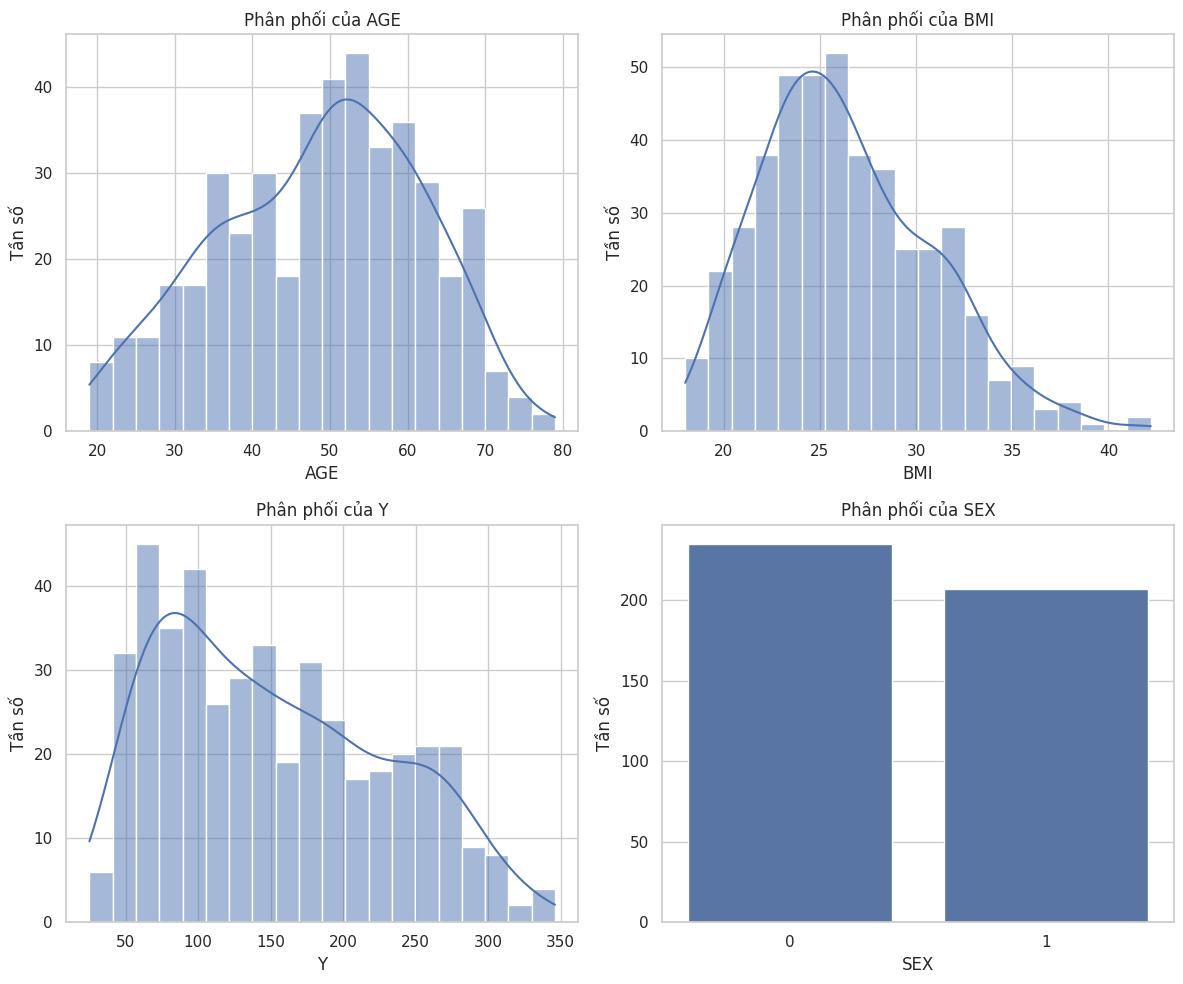

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Thiết lập kiểu dáng cho biểu đồ
sns.set(style="whitegrid")

# Vẽ biểu đồ phân phối cho biến AGE
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.histplot(df['AGE'], kde=True, bins=20)
plt.title('Phân phối của AGE')
plt.xlabel('AGE')
plt.ylabel('Tần số')

# Vẽ biểu đồ phân phối cho biến BMI
plt.subplot(2, 2, 2)
sns.histplot(df['BMI'], kde=True, bins=20)
plt.title('Phân phối của BMI')
plt.xlabel('BMI')
plt.ylabel('Tần số')

# Vẽ biểu đồ phân phối cho biến Y
plt.subplot(2, 2, 3)
sns.histplot(df['Y'], kde=True, bins=20)
plt.title('Phân phối của Y')
plt.xlabel('Y')
plt.ylabel('Tần số')

# Vẽ biểu đồ tần số cho biến SEX
plt.subplot(2, 2, 4)
sns.countplot(x='SEX', data=df)
plt.title('Phân phối của SEX')
plt.xlabel('SEX')
plt.ylabel('Tần số')

# Điều chỉnh khoảng cách giữa các biểu đồ
plt.tight_layout()

# Hiển thị biểu đồ
plt.show()


**Nhận định:**
* Các biến BMI và AGE có dạng phân phối gần chuẩn với đỉnh và các giá trị trải dần về 2 cực, càng về xa điểm trung bình thì tần suất càng giảm.
* Biến Y - mức độ tiến triển của bệnh thì không có phân phối chuẩn, có dạng 2 đỉnh ở 2 giá trị X cách xa nhau.

### Task 4: Test the correlation between different variables and disease progression (Y)

> **Hint** Correlation matrix would give you the most useful information on which values are dependent.

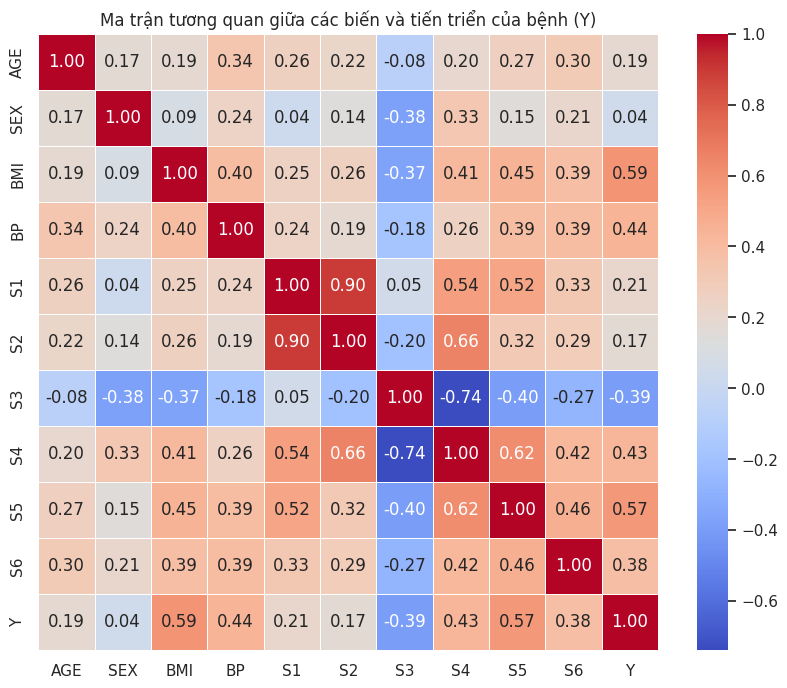

In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Tính toán ma trận tương quan
corr_matrix = df.corr()

# Thiết lập kích thước cho biểu đồ
plt.figure(figsize=(10, 8))

# Vẽ bản đồ nhiệt cho ma trận tương quan
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Thiết lập tiêu đề cho biểu đồ
plt.title('Ma trận tương quan giữa các biến và tiến triển của bệnh (Y)')

# Hiển thị biểu đồ
plt.show()


**Nhận định:**
* Các biến có tương quan dương với Y rõ rệt là: BMI, S5 và BP, nghĩa là Y có biến động cùng chiều với chỉ số khối cơ thể, huyết áp trung bình.
* Ngược lại, riêng biến S3 có tương quan âm với Y.

### Task 5: Test the hypothesis that the degree of diabetes progression is different between men and women

Trước khi thực hiện kiểm định t, cần kiểm tra xem phương sai của hai nhóm có bằng nhau không bằng kiểm định Levene. Điều này giúp xác định loại kiểm định t phù hợp: kiểm định t với phương sai bằng nhau hoặc kiểm định t với phương sai khác nhau.

Dựa trên kết quả kiểm định Levene, tiến hành kiểm định t để so sánh trung bình của hai nhóm.

In [36]:
import pandas as pd
import scipy.stats as stats

# Tách dữ liệu theo giới tính
male_Y = df[df['SEX'] == 0]['Y']
female_Y = df[df['SEX'] == 1]['Y']

# Kiểm tra giả định về phương sai bằng kiểm định Levene
levene_stat, levene_p = stats.levene(male_Y, female_Y)
print(f'Levene test p-value: {levene_p:.4f}')

# Thực hiện kiểm định t độc lập hai mẫu
equal_var = levene_p > 0.05  # Nếu p-value > 0.05, giả định phương sai bằng nhau
t_stat, p_value = stats.ttest_ind(male_Y, female_Y, equal_var=equal_var)
print(f't-statistic: {t_stat:.4f}, p-value: {p_value:.4f}')

# Đánh giá kết quả
alpha = 0.05
if p_value < alpha:
    print('Có sự khác biệt có ý nghĩa thống kê về mức độ tiến triển của bệnh giữa nam và nữ.')
else:
    print('Không có sự khác biệt có ý nghĩa thống kê về mức độ tiến triển của bệnh giữa nam và nữ.')


Levene test p-value: 0.4232
t-statistic: -0.9041, p-value: 0.3664
Không có sự khác biệt có ý nghĩa thống kê về mức độ tiến triển của bệnh giữa nam và nữ.


**Nhận định:** Như vậy thông qua kiểm định T, chúng ta không thấy có sự khác biệt về mức độ tiến triển của bệnh giữa nam và nữ. Điều này cũng phù hợp với nhận định nhanh dựa vào biểu đồ hộp ở Task 2.

## Task 6: Kiểm định giả thuyết huyết áp trung bình của nữ cao hơn nam.

* Bước 1. Xác định giả thuyết:

Giả thuyết không (H₀): Huyết áp trung bình của nữ không cao hơn nam (có thể bằng hoặc thấp hơn).

Giả thuyết thay thế (H₁): Huyết áp trung bình của nữ cao hơn nam.

* Bước 2. Kiểm tra giả định về phương sai:

Trước khi thực hiện kiểm định t, cần kiểm tra xem phương sai của hai nhóm có bằng nhau không bằng kiểm định Levene. Điều này giúp xác định loại kiểm định t phù hợp: kiểm định t với phương sai bằng nhau hoặc kiểm định t với phương sai khác nhau.

* Bước 3. Thực hiện kiểm định t độc lập hai mẫu:

Dựa trên kết quả kiểm định Levene, tiến hành kiểm định t để so sánh trung bình huyết áp giữa nam và nữ.

In [37]:
import pandas as pd
import scipy.stats as stats

# Tách dữ liệu huyết áp theo giới tính
bp_nam = df[df['SEX'] == 0]['BP']
bp_nu = df[df['SEX'] == 1]['BP']

# Kiểm tra giả định về phương sai bằng kiểm định Levene
levene_stat, levene_p = stats.levene(bp_nam, bp_nu)
print(f'Levene test p-value: {levene_p:.4f}')

# Thực hiện kiểm định t độc lập hai mẫu (giả thuyết một phía)
equal_var = levene_p > 0.05  # Nếu p-value > 0.05, giả định phương sai bằng nhau
t_stat, p_value = stats.ttest_ind(bp_nam, bp_nu, equal_var=equal_var, alternative='less')
print(f't-statistic: {t_stat:.4f}, p-value: {p_value:.4f}')

# Đánh giá kết quả
alpha = 0.05
if p_value < alpha:
    print('Có sự khác biệt có ý nghĩa thống kê: huyết áp trung bình của nữ cao hơn nam.')
else:
    print('Không có sự khác biệt có ý nghĩa thống kê: huyết áp trung bình của nữ không cao hơn nam.')


Levene test p-value: 0.6149
t-statistic: -5.2090, p-value: 0.0000
Có sự khác biệt có ý nghĩa thống kê: huyết áp trung bình của nữ cao hơn nam.


**Nhận định:**

Như vậy, thông qua kiểm định T có thể thể kết luận huyết áp trung bình của nữ giới cao hơn nam giới trong mẫu trên.